In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/hour.csv', index_col = 0)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [6]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<ipython-input-10-5c614a7c6cbc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


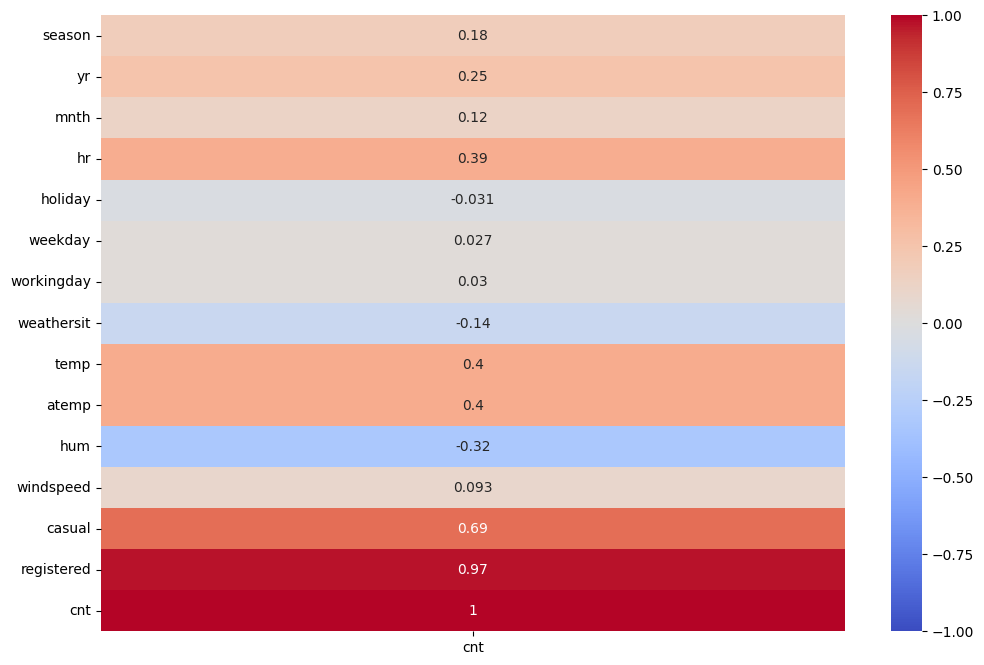

In [10]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['cnt'].abs().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['cnt']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# Select features with correlation above a certain threshold (e.g., 0.1)
correlation_threshold = 0.1
high_correlation_features = target_correlation[target_correlation > correlation_threshold].index.tolist()

<H1> Data Preprocessing </H1>

In [31]:
X = df[['temp', 'hum']]
y = df['cnt']
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
has_missing_values = np.isnan(X_scaled).any()

if has_missing_values:
    print("The data contains missing values.")
else:
    print("No missing values in the data.")

No missing values in the data.


In [33]:
X_scaled.shape

(17379, 2)

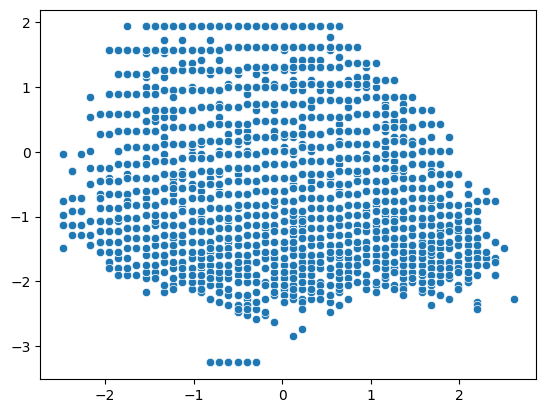

In [55]:
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:, 1])
plt.show()

In [51]:
has_missing_values = np.isnan(X).any()

if has_missing_values:
    print("The data contains missing values.")
else:
    print("No missing values in the data.")

No missing values in the data.


In [40]:
X = np.array(X)
X

array([[0.24, 0.81],
       [0.22, 0.8 ],
       [0.22, 0.8 ],
       ...,
       [0.26, 0.6 ],
       [0.26, 0.56],
       [0.26, 0.65]])

<H2> K-means Clustering </H2>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

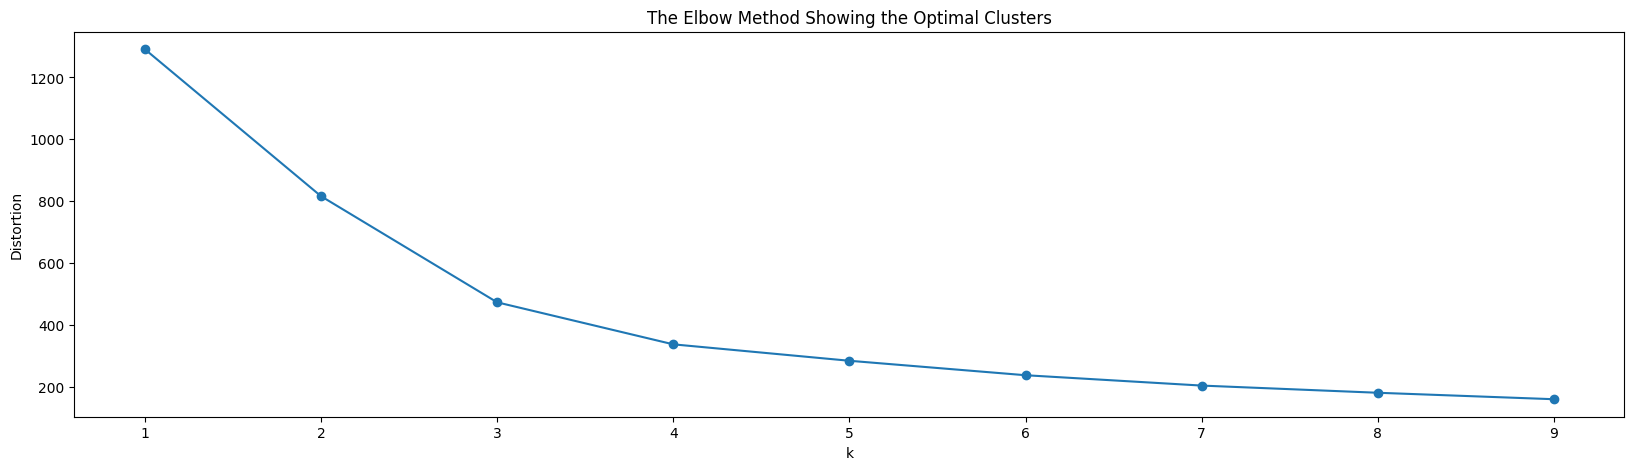

In [80]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize = (20, 5))
plt.plot(K, distortions, 'o-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the Optimal Clusters')
plt.show()

In [42]:
optimal_k = 3

In [43]:
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [44]:
df['cluster'] = kmeans.labels_

In [45]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

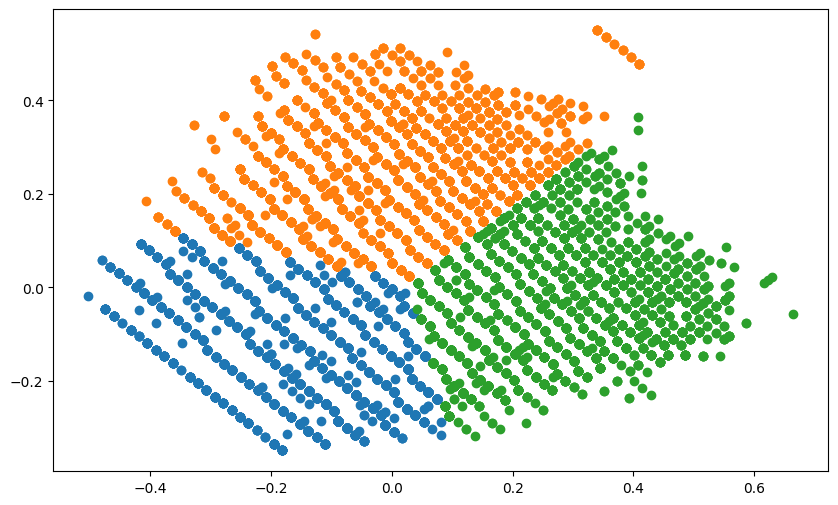

In [46]:
plt.figure(figsize = (10, 6))
for cluster in df['cluster'].unique():
    plt.scatter(df[df['cluster'] == cluster]['PCA1'],
                df[df['cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}')

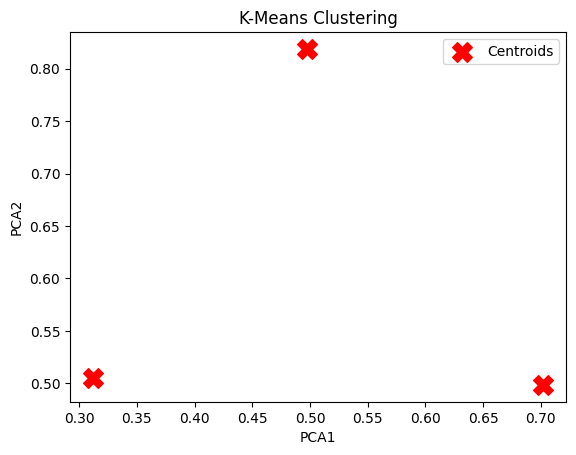

In [47]:
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'X', s = 200, c = 'red', label = 'Centroids')

plt.title('K-Means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [48]:
silhouette_avg = "{:.2f}".format(silhouette_score(X, kmeans.labels_))

print(f"Silhouette Score for K-Means Clustering: {silhouette_avg}")

Silhouette Score for K-Means Clustering: 0.41


<H2> Agglomerative Clustering </H2>

In [49]:
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters = n_clusters, linkage = 'ward')
agg_labels = agg_clustering.fit_predict(X)

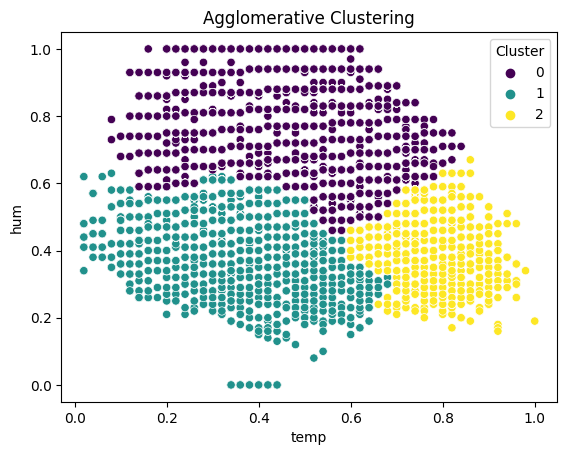

In [56]:
agg_labels = agg_clustering.fit_predict(X)

# Create a DataFrame from your data and cluster labels
df = pd.DataFrame({'temp': X[:, 0], 'hum': X[:, 1], 'Cluster': agg_labels})

# Use Seaborn's scatterplot function
sns.scatterplot(x='temp', y='hum', hue='Cluster', palette='viridis', data=df)
plt.title('Agglomerative Clustering')
plt.show()

In [53]:
silhouette_avg = "{:.2f}".format(silhouette_score(X, agg_labels))

print(f"Silhouette Score for Agglomerative Clustering: {silhouette_avg}")

Silhouette Score for Agglomerative Clustering: 0.34


<H2> DBScan </H2>

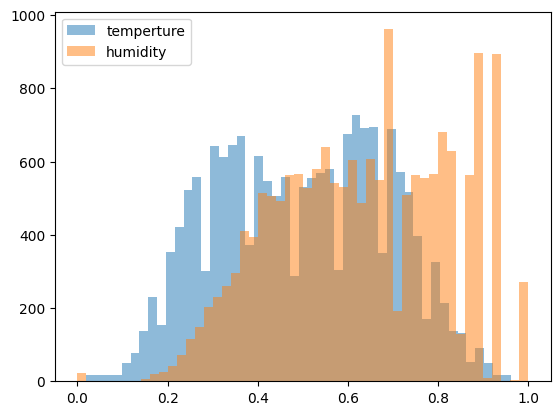

In [57]:
plt.hist(X[:, 0], bins=50, alpha=0.5, label='temperture')
plt.hist(X[:, 1], bins=50, alpha=0.5, label='humidity')
plt.legend()
plt.show()

In [58]:
eps = 0.4
min_samples = 15
dbscan = DBSCAN(eps = eps, min_samples = min_samples)
dbscan_labels = dbscan.fit_predict(X)

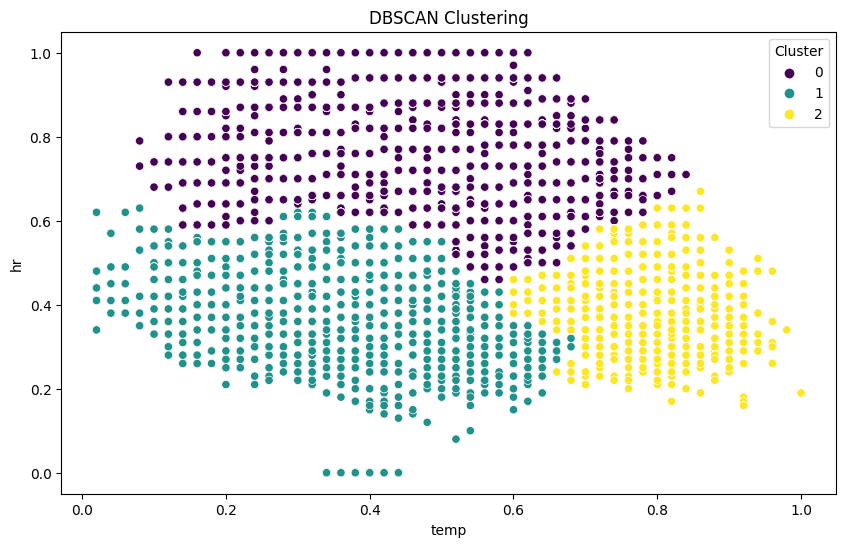

In [60]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x='temp', y='hum', hue='Cluster', palette='viridis', data=df)
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('DBSCAN Clustering')
plt.show()

In [61]:
unique_labels = np.unique(dbscan_labels)

if len(unique_labels) > 1:
    silhouette_avg = silhouette_score(X[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"Silhouette Score: {silhouette_avg}")

else:
    print("DBSCAN resulted in only one unique label or all noise points.")

DBSCAN resulted in only one unique label or all noise points.


Не смогли посчитать silhouette score для DBSCAN

# Найдем лучшие параметры для K-means

In [63]:
def evaluate_clustering(model, X):
    y_pred = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_pred)
    return silhouette_avg

In [67]:
def cluster_and_plot(model, X, title):
    y_pred = model.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
    plt.title(title)
    plt.show()

In [81]:
# Оценка качества для K-means
kmeans_silhouette = evaluate_clustering(kmeans, X)
print(f"K-means Silhouette Score: {kmeans_silhouette}")

# DBScan не имеет явной метрики качества, так что здесь оценим только визуально

# Выбор лучшего метода и гиперпараметров
# (в данном случае, оценка по максимальному силуэту)
best_model = None
best_score = -1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Silhouette Score: 0.36848077020670805


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

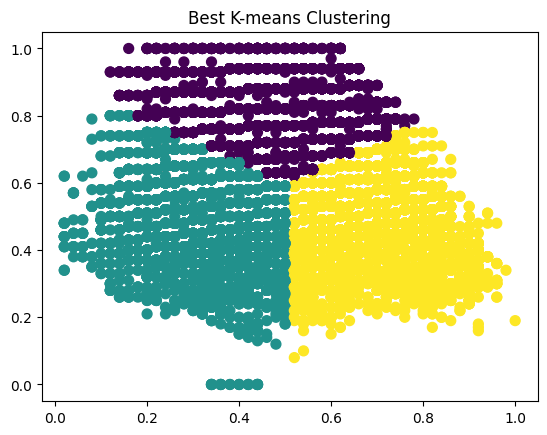

In [72]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    score = evaluate_clustering(kmeans, X)
    if score > best_score:
        best_score = score
        best_model = kmeans

# Визуализация лучшего решения
cluster_and_plot(best_model, X, 'Best K-means Clustering')

In [74]:
print(best_model.n_clusters,best_score)

3 0.40759924719421764


Оптимальное количество кластеров: 3, лучший результат: 0.407

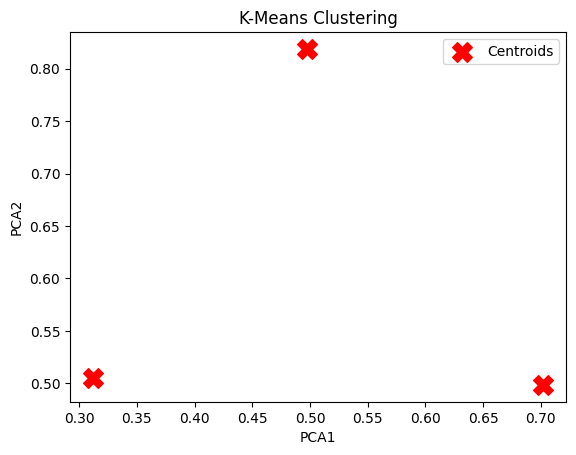

In [75]:
centroids = best_model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'X', s = 200, c = 'red', label = 'Centroids')

plt.title('K-Means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# Найдем лучшие параметры для AgglomerativeClustering

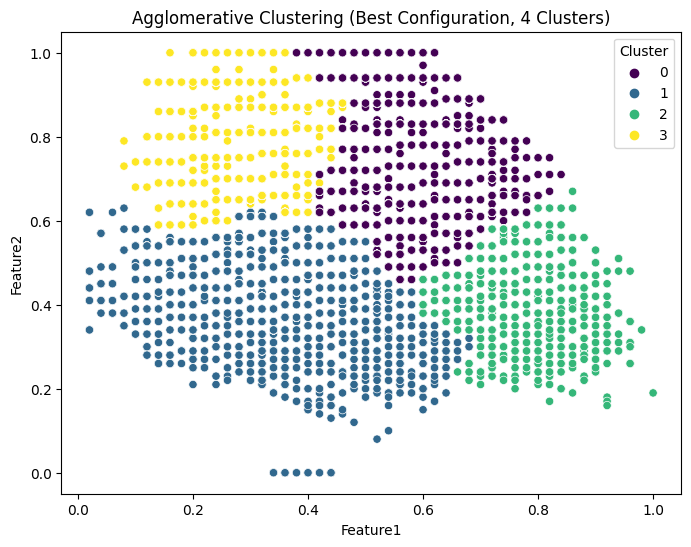

In [76]:
# Choosing the best configuration
best_score = -1
best_n_clusters = 0

for n_clusters in range(2, 6):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = agg_clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_pred)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters

# Creating the final agglomerative clustering model with the best configuration
best_agg_clustering = AgglomerativeClustering(n_clusters=best_n_clusters)
best_labels = best_agg_clustering.fit_predict(X)

# Visualizing the best solution using Seaborn
df = pd.DataFrame({'Feature1': X[:, 0], 'Feature2': X[:, 1], 'Cluster': best_labels})
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', palette='viridis', data=df)
plt.title(f'Agglomerative Clustering (Best Configuration, {best_n_clusters} Clusters)')
plt.show()

In [77]:
print(best_n_clusters,best_score)

4 0.36301033425788987


Оптимальное количество кластеров: 4, лучший результат: 0.363

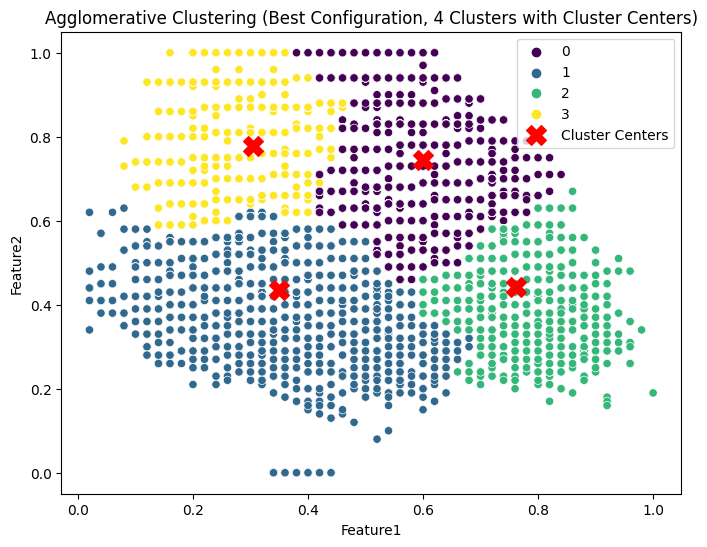

In [79]:
best_agg_clustering = AgglomerativeClustering(n_clusters=best_n_clusters)
best_labels = best_agg_clustering.fit_predict(X)

# Calculating cluster centers
cluster_centers = []
for cluster_label in range(best_n_clusters):
    cluster_mask = best_labels == cluster_label
    cluster_center = X[cluster_mask].mean(axis=0)
    cluster_centers.append(cluster_center)

cluster_centers = np.array(cluster_centers)

# Visualizing the best solution with cluster centers using Seaborn
df = pd.DataFrame({'Feature1': X[:, 0], 'Feature2': X[:, 1], 'Cluster': best_labels})
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', palette='viridis', data=df)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, c='red', label='Cluster Centers')
plt.title(f'Agglomerative Clustering (Best Configuration, {best_n_clusters} Clusters with Cluster Centers)')
plt.legend()
plt.show()

# Найдем лучшие параметры DBSCAN

Best Parameters: {'eps': 0.1, 'min_samples': 5}
Best Silhouette Score: 0.9216177482136689


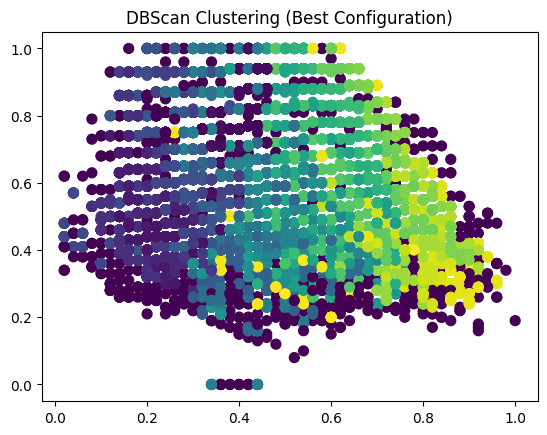

In [84]:
from sklearn.model_selection import ParameterGrid
X_scaled = StandardScaler().fit_transform(X)

# Define the parameter grid
param_grid = {
    'eps': np.linspace(0.1, 1.0, 10),
    'min_samples': range(5, 20)
}

best_score = -1
best_params = None

# Perform grid search
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(X_scaled)

    # Check if more than one cluster is formed
    if len(np.unique(labels)) > 1:
        silhouette_avg = silhouette_score(X_scaled, labels)

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params = params

# Check if at least one valid configuration was found
if best_params is not None:
    # Print the best parameters and corresponding silhouette score
    print("Best Parameters:", best_params)
    print("Best Silhouette Score:", best_score)

    # Fit DBScan with the best parameters
    best_dbscan = DBSCAN(**best_params)
    best_labels = best_dbscan.fit_predict(X_scaled)

    # Visualize the best solution
    plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', s=50)
    plt.title('DBScan Clustering (Best Configuration)')
    plt.show()
else:
    print("No valid configuration found. Adjust parameters or check the data.")

# Вывод
Лучшим решением оказался алгоритм DBSCAN с параметрами eps: 0.1, min_samples: 5, его результат равен 0.921